
Import dependencies

In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import gmaps
from scipy.stats import linregress
import scipy.stats as stats

Import Excel workbooks using pandas

This function reads in the data from the file passed as parameter and concatenates it with the dataFrame passed in.

In [2]:
def read_file(dataFrame, input_file_path, race_code, year):
    try:
        temp_df = pd.read_excel (input_file_path, sheet_name = 'Region', \
        names=['Characteristic','Value Type', 'Northeast', 'Midwest','South','West'],\
        header=None,\
        skiprows=43,\
        index_col=None,\
        usecols="A,B,C:G")
        temp_df["Race"] = race_code
        temp_df["Year"] = year
        temp_df.fillna(method='ffill', inplace=True)
        frames = [dataFrame, temp_df]
        dataFrame = pd.concat(frames, ignore_index=True)
        temp_df["Characteristic"] = temp_df["Characteristic"].str.replace('\n','')
        temp_df["Value Type"]     = temp_df["Value Type"].str.replace('\n','')
    except:
        print("Error while trying to read in file ", input_file_path)
    finally:
        return(dataFrame)
    

In [3]:
#go thru all the files by year and then by races
try:
    del df
except NameError:
    pass

df = pd.DataFrame()
#----------------------------- 2015 ---------------------------------------------------------#
#2015 - All races
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2015_finc_01_ALL_RACES.xls'),  "All Races", 2015)
#2015 - White only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2015_finc_01_WHITE_ONLY.xls'), "White", 2015)
#2015 - Black only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2015_finc_01_BLACK_ONLY.xls'), "Black", 2015)
#2015 - Asian only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2015_finc_01_ASIAN_ONLY.xls'), "Asian", 2015)
#2015 - Hispanic only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2015_finc_01_HISP_ONLY.xls'),  "Hispanic", 2015)
#----------------------------- 2016 ---------------------------------------------------------#
#2016 - All races
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2016_finc_01_ALL_RACES.xls'),  "All Races", 2016)
#2016 - White only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2016_finc_01_WHITE_ONLY.xls'), "White", 2016)
#2016 - Black only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2016_finc_01_BLACK_ONLY.xls'), "Black", 2016)
#2016 - Asian only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2016_finc_01_ASIAN_ONLY.xls'), "Asian", 2016)
#2016 - Hispanic only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2016_finc_01_HISP_ONLY.xls'),  "Hispanic", 2016)
#----------------------------- 2017 ---------------------------------------------------------#
#2017 - All races
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2017_finc_01_ALL_RACES.xls'),  "All Races", 2017)
#2017 - White only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2017_finc_01_WHITE_ONLY.xls'), "White", 2017)
#2017 - Black only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2017_finc_01_BLACK_ONLY.xls'), "Black", 2017)
#2017 - Asian only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2017_finc_01_ASIAN_ONLY.xls'), "Asian", 2017)
#2017 - Hispanic only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2017_finc_01_HISP_ONLY.xls'),  "Hispanic", 2017)
#----------------------------- 2018 ---------------------------------------------------------#
#2018 - All races
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_ALL_RACES.xlsx'),  "All Races", 2018)
#2018 - White only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_WHITE_ONLY.xlsx'), "White", 2018)
#2018 - Black only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_BLACK_ONLY.xlsx'), "Black", 2018)
#2018 - Asian only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_ASIAN_ONLY.xlsx'), "Asian", 2018)
#2018 - Hispanic only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_HISP_ONLY.xlsx'),  "Hispanic", 2018)
#----------------------------- 2019 ---------------------------------------------------------#
#2019 - All races
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_ALL_RACES.xlsx'),  "All Races", 2019)
#2019 - White only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_WHITE_ONLY.xlsx'), "White", 2019)
#2019 - Black only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_BLACK_ONLY.xlsx'), "Black", 2019)
#2019 - Asian only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_ASIAN_ONLY.xlsx'), "Asian", 2019)
#2019 - Hispanic only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_HISP_ONLY.xlsx'),  "Hispanic", 2019)

In [4]:
df = df[['Characteristic','Value Type', 'Race', 'Year', 'Northeast', 'Midwest','South', 'West']]
df

,Characteristic,Value Type,Race,Year,Northeast,Midwest,South,West
0,Median income,Value\n(Dol.),All Races,2015,80482.0000,73535.0000,62544.000,72399.0000
1,Median income,Standard\nerror (Dol.),All Races,2015,1128.0000,1084.0000,712.000,842.0000
2,Mean income,Value\n(Dol.),All Races,2015,103932.0000,92269.0000,86162.000,95393.0000
3,Mean income,Standard\nerror (Dol.),All Races,2015,1514.0000,1118.0000,833.000,1082.0000
4,Gini ratio,Ratio,All Races,2015,0.4450,0.4160,0.464,0.4480
...,...,...,...,...,...,...,...,...
195,Mean income,Standard error (Dol.),Hispanic,2019,3110.0000,3791.0000,1807.000,1445.0000
196,Gini ratio,Ratio,Hispanic,2019,0.4810,0.4150,0.440,0.4180
197,Gini ratio,Standard error,Hispanic,2019,0.0134,0.0184,0.007,0.0063
198,Income per family member,Value (Dol.),Hispanic,2019,22520.0000,22024.0000,21471.000,20863.0000


In [77]:
df_region=df.drop_duplicates(['Race','Year'],keep='first')
del df_region['Characteristic']
del df_region['Value Type']
#df_region=df_region.sort_values("Year",inplace=True)
df_region=df_region.reset_index(drop=True)
df_region

,Race,Year,Northeast,Midwest,South,West
0,All Races,2015,80482.0,73535.0,62544.0,72399.0
1,White,2015,85746.0,77088.0,67325.0,72370.0
2,Black,2015,47313.0,43392.0,45140.0,53700.0
3,Asian,2015,93898.0,96042.0,81953.0,91749.0
4,Hispanic,2015,42713.0,50208.0,46462.0,49631.0
5,All Races,2016,81502.0,75275.0,66505.0,75525.0
6,White,2016,86093.0,78643.0,71338.0,75338.0
7,Black,2016,54556.0,47729.0,47367.0,58745.0
8,Asian,2016,95704.0,100206.0,89931.0,93415.0
9,Hispanic,2016,48524.0,51155.0,50630.0,52378.0


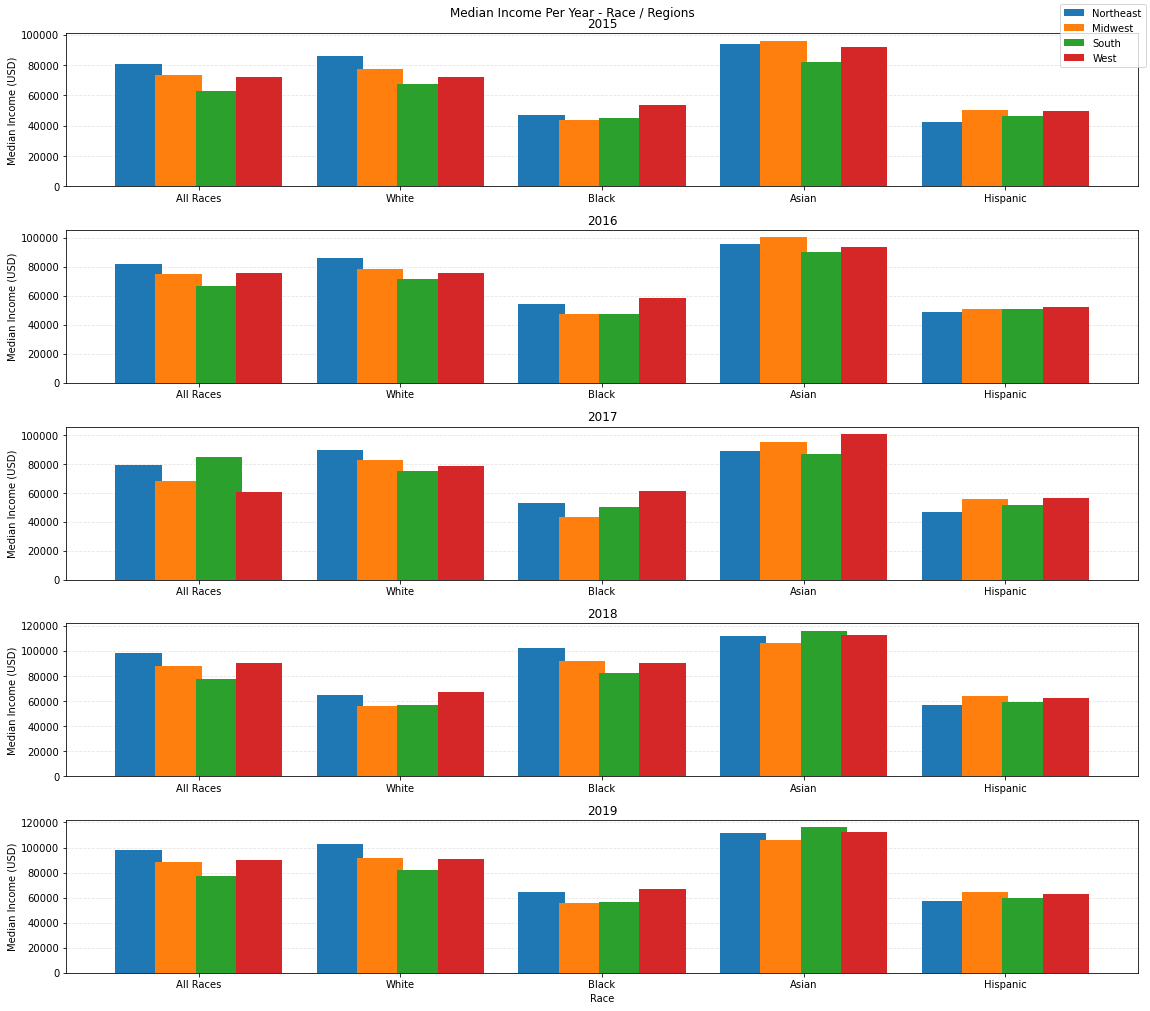

In [67]:
#Generate year subplots median income in each region by races
fig, axs= plt.subplots(5,figsize=(16,14))
i=0
x=np.arange(0,len(df_region['Race'].unique()))

years=df_region['Year'].unique()
regions=['Northeast','Midwest','South','West']
#plot by years
for y in years:
    #plt by region
    axs[i].bar(x-0.3, df_region[df_region["Year"] == y]['Northeast'], width=0.23)
    axs[i].bar(x-0.1, df_region[df_region["Year"] == y]['Midwest'], width=0.23)
    axs[i].bar(x+0.1, df_region[df_region["Year"] == y]['South'], width=0.23)
    axs[i].bar(x+0.3, df_region[df_region["Year"] == y]['West'], width=0.23)
    axs[i].set_xticks(x)
    x_values = df_region[df_region["Year"] == y]["Race"]
    axs[i].set_xticklabels(x_values)
    axs[i].set_axisbelow(True)
    axs[i].set_title(y)
    axs[i].yaxis.grid(color='gray',linestyle='dashed',alpha=0.2)
    axs[i].set(ylabel='Median Income (USD)')
    i=i+1
axs[i-1].set(xlabel='Race')
fig.legend(regions, loc='upper right')
fig.suptitle("Median Income Per Year - Race / Regions",y=1)
fig.tight_layout()
plt.savefig("Images/Incomeracevsregionbyyear")
plt.show()

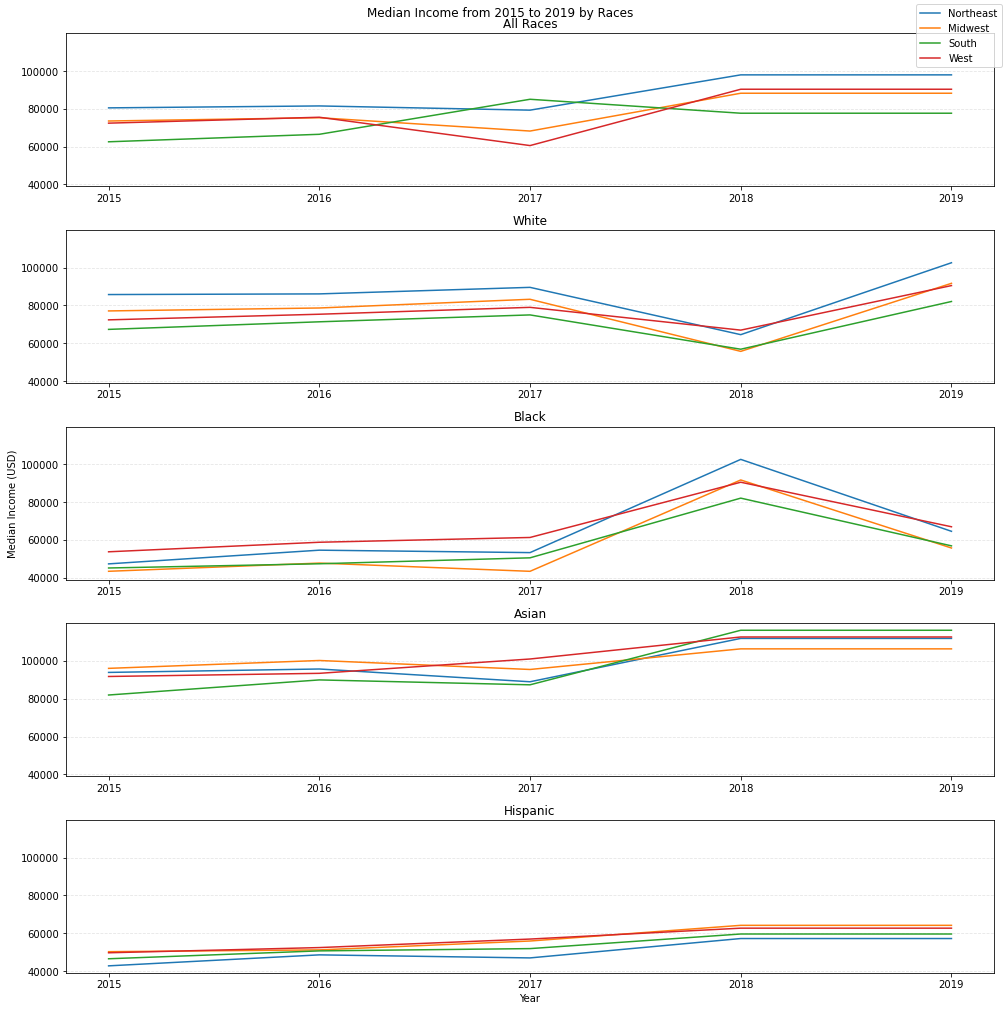

In [68]:
# Generate a races subplots median income by regions by year
fig, axs = plt.subplots(5,figsize=(14,14),sharey=True)

list_race=df_region['Race'].unique()
i=0
years=years.astype(str)
for race in list_race:
    df_grouped= df_region.loc[df_region['Race'] == race]
    for r in regions:
        axs[i].plot(years,df_grouped[r])
        axs[i].yaxis.grid(color='gray',linestyle='dashed',alpha=0.2)
        axs[i].set_title(race)
    i=i+1
        
# Y-Limits
#Labels and titles
axs[2].set(ylabel='Median Income (USD)')
axs[4].set(xlabel='Year')
fig.suptitle('Median Income from 2015 to 2019 by Races', y=1)
fig.legend(regions, loc='upper right')
# Show the chart
fig.tight_layout()
plt.savefig("Images/Incomevsrace_region.png")
plt.show()


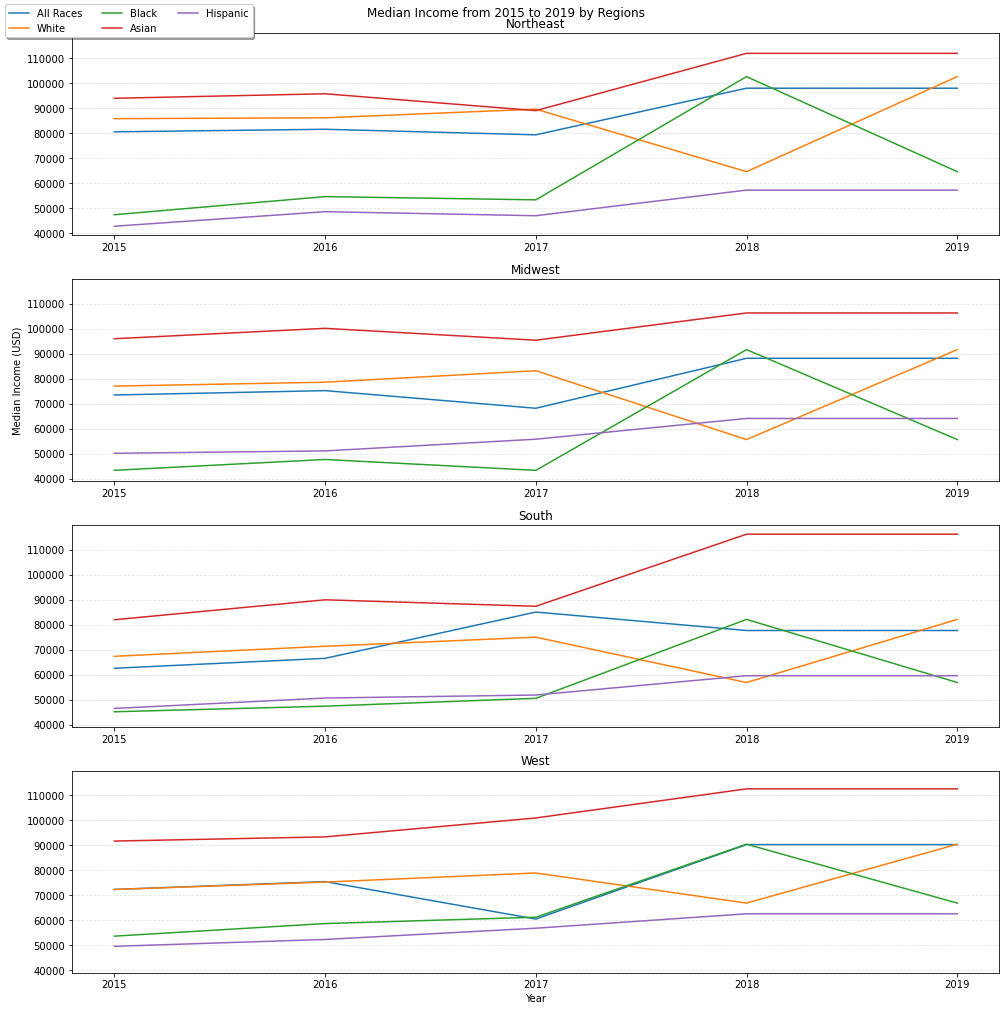

In [69]:
# Generate a region subplots median income by races by year
fig, axs = plt.subplots(4,figsize=(14,14),sharey=True)
list_race=df_region['Race'].unique()
i=0
for r in regions:
    df_grouped= df_region[['Race','Year',r]]
    for race in list_race:
        df_plot= df_grouped.loc[df_grouped['Race'] == race]
        axs[i].plot(years,df_plot[r])
        axs[i].yaxis.grid(color='gray',linestyle='dashed',alpha=0.2)
        axs[i].set_title(r)
    i=i+1
        
# Y-Limits
#Labels and titles
axs[1].set(ylabel='Median Income (USD)')
axs[3].set(xlabel='Year')
fig.suptitle('Median Income from 2015 to 2019 by Regions', y=1)
fig.legend(list_race, loc='upper left',fancybox=True, shadow=True, ncol=3)
# Show the chart
fig.tight_layout()
plt.savefig("Images/Incomevsregion_race.png")
plt.show()

In [79]:
# Generate a races subplots median income by regions by year
df_region.loc[:,"Country Mean"] =df_region.mean(axis=1)
df_region

,Race,Year,Northeast,Midwest,South,West,Country Mean
0,All Races,2015,80482.0,73535.0,62544.0,72399.0,58195.0
1,White,2015,85746.0,77088.0,67325.0,72370.0,60908.8
2,Black,2015,47313.0,43392.0,45140.0,53700.0,38312.0
3,Asian,2015,93898.0,96042.0,81953.0,91749.0,73131.4
4,Hispanic,2015,42713.0,50208.0,46462.0,49631.0,38205.8
5,All Races,2016,81502.0,75275.0,66505.0,75525.0,60164.6
6,White,2016,86093.0,78643.0,71338.0,75338.0,62685.6
7,Black,2016,54556.0,47729.0,47367.0,58745.0,42082.6
8,Asian,2016,95704.0,100206.0,89931.0,93415.0,76254.4
9,Hispanic,2016,48524.0,51155.0,50630.0,52378.0,40940.6


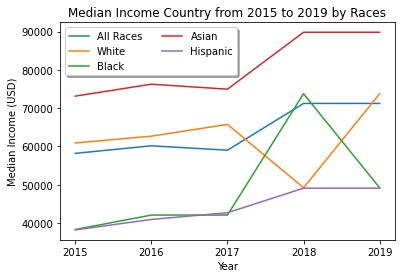

In [88]:
for race in list_race:
    df_grouped= df_region[df_region['Race'] == race]
    plt.plot(years, df_grouped['Country Mean'])
    
plt.xlabel('Year')
plt.ylabel('Median Income (USD)')
plt.title('Median Income Country from 2015 to 2019 by Races', y=1)
plt.legend(list_race, loc='upper left',fancybox=True, shadow=True, ncol=2)
# Show the chart
fig.tight_layout()
plt.savefig("Images/incomecountry_race.png")
plt.show()

In [89]:
for r in regions:
    group1 =  df_region[df_region["Race"] == "White"][r].astype(int)
    group2 =  df_region[df_region["Race"] == "Black"][r].astype(int)
    group3 =  df_region[df_region["Race"] == "Asian"][r].astype(int)
    group4 =  df_region[df_region["Race"] == "Hispanic"][r].astype(int)
    # Perform the ANOVA
    print(r)
    print(stats.f_oneway(group1, group2, group3, group4))

Northeast
F_onewayResult(statistic=11.766738341420005, pvalue=0.000254071147099651)
Midwest
F_onewayResult(statistic=13.249401792795743, pvalue=0.00013262554169996696)
South
F_onewayResult(statistic=13.476934281567438, pvalue=0.00012057150281960234)
West
F_onewayResult(statistic=18.284756981711645, pvalue=2.017833147738843e-05)


In [90]:
df_region
population1 = df_region["Northeast"]
population2 = df_region["Midwest"]
population3 = df_region["South"]
population4 = df_region["West"]
print("Northeast: ",population1.mean(),"Midwest: ", population2.mean(),"South: ",population3.mean(),"West : ",population4.mean())


Northeast:  77705.88 Midwest:  74064.36 South:  70540.44 West :  75999.4


In [ ]:
#stats.ttest_ind(population1, population2, population3, population4, equal_var=False)